##  Evaluate Results Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [211]:
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,)

In [2]:
df = pd.read_csv('../results.csv')

In [3]:
df.columns

Index(['unit_sizing_case', 'demand_kW', 'unit_capacity_kW', 'units_reqd',
       'units_installed', 'unit_reliability_pct', 'unit_schedule_outage_hrs',
       'system_capacity_kW', 'redundant_units', 'system_availability',
       'tier_level'],
      dtype='object')

In [156]:
df.head()

,unit_sizing_case,demand_kW,unit_capacity_kW,units_reqd,units_installed,unit_reliability_pct,unit_schedule_outage_hrs,system_capacity_kW,redundant_units,system_availability,tier_level
0,unit_size_2,200000.0,111110.0,2,2,96.0,504.0,222220.0,0,81.555288,Tier NA
1,unit_size_2,200000.0,111110.0,2,3,96.0,504.0,333330.0,1,98.260235,Tier NA
2,unit_size_2,200000.0,111110.0,2,4,96.0,504.0,444440.0,2,99.873363,Tier 2
3,unit_size_2,200000.0,111110.0,2,5,96.0,504.0,555550.0,3,99.991974,Tier 3
4,unit_size_2,200000.0,111110.0,2,6,96.0,504.0,666660.0,4,99.999533,Tier 4


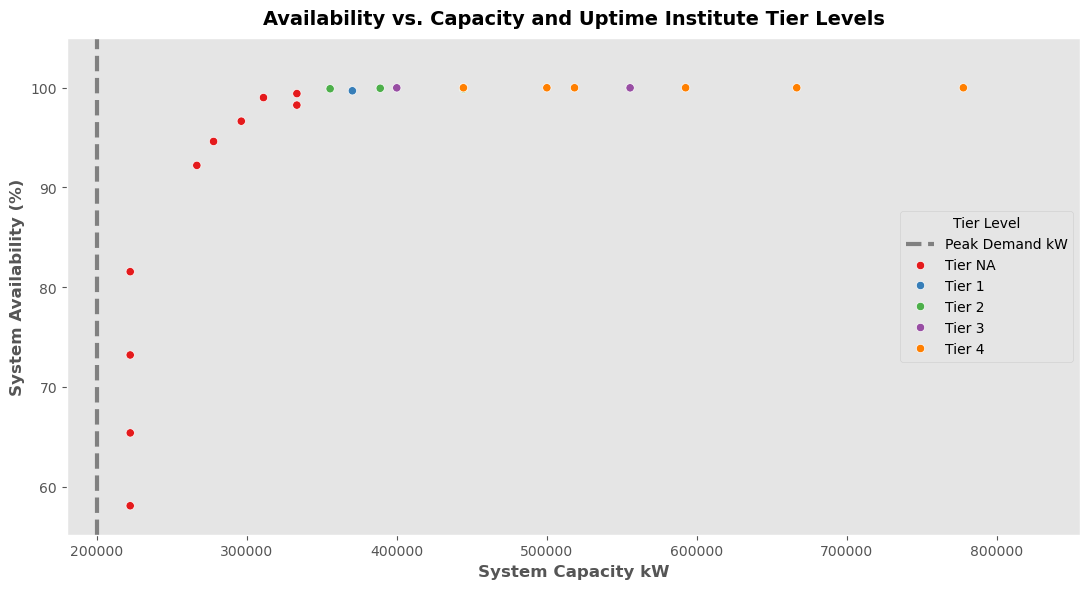

In [212]:
fig, axs = plt.subplots(figsize=(11,6))

axs.axvline(
    x=df.demand_kW.mean(),  # Use the mean or any representative value
    color='gray', 
    linewidth=3,  # Adjust line thickness
    alpha=1.0,
    linestyle='--',
    label='Peak Demand kW'
)
sns.scatterplot(data=df, x='system_capacity_kW', y='system_availability', 
                hue='tier_level', hue_order=['Tier NA', 'Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'], ax=axs, palette='Set1')
plt.xlabel('System Capacity kW')
plt.ylabel('System Availability (%)')
plt.title('Availability vs. Capacity and Uptime Institute Tier Levels')
plt.legend(title='Tier Level', loc='center right' )
plt.xlim(df.demand_kW.min()*0.9, df.system_capacity_kW.max()*1.1)  # Adjust based on your data
plt.ylim(df.system_availability.min()*0.95, df.system_availability.max()*1.05)  # Optional: adjust y-axis if needed
plt.grid()
plt.show()

In [7]:
filter = (df['tier_level'].isin(['Tier 4'])) & (df.system_capacity_kW < 550000)
df[filter].sort_values('system_capacity_kW')

,unit_sizing_case,demand_kW,unit_capacity_kW,units_reqd,units_installed,unit_reliability_pct,unit_schedule_outage_hrs,system_capacity_kW,redundant_units,system_availability,tier_level
23,unit_size_5,200000.0,44440.0,5,10,96.0,504.0,444400.0,5,99.999320,Tier 4
16,unit_size_4,200000.0,55560.0,4,8,96.0,504.0,444480.0,4,99.995979,Tier 4
17,unit_size_4,200000.0,55560.0,4,9,96.0,504.0,500040.0,5,99.999717,Tier 4
10,unit_size_3,200000.0,74070.0,3,7,96.0,504.0,518490.0,4,99.998431,Tier 4


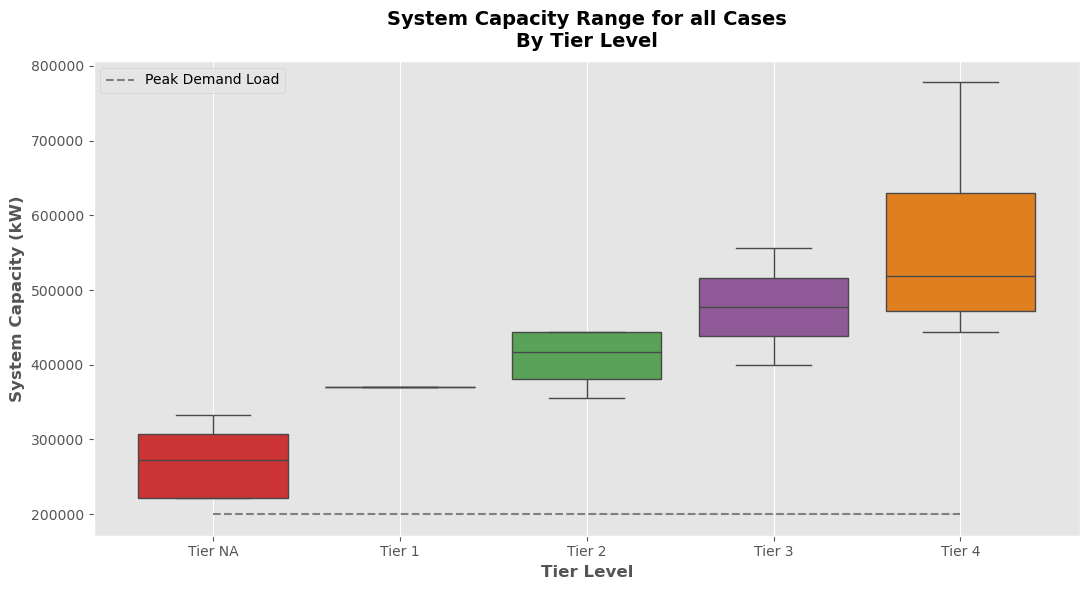

In [219]:
plt.subplots(figsize=(11,6))
sns.boxplot(data=df, x='tier_level', y='system_capacity_kW', 
                hue='tier_level', order=['Tier NA', 'Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],
                hue_order=['Tier NA', 'Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'], palette='Set1')
sns.lineplot(data=df, x='tier_level', y='demand_kW', linestyle='--', label='Peak Demand Load', color='gray')
plt.xlabel('Tier Level')
plt.ylabel('System Capacity (kW)')
plt.title('System Capacity (kW) BoxPlot for different tier levels')
plt.legend(loc='upper left')
plt.title('System Capacity Range for all Cases\nBy Tier Level')
plt.grid()
plt.show()

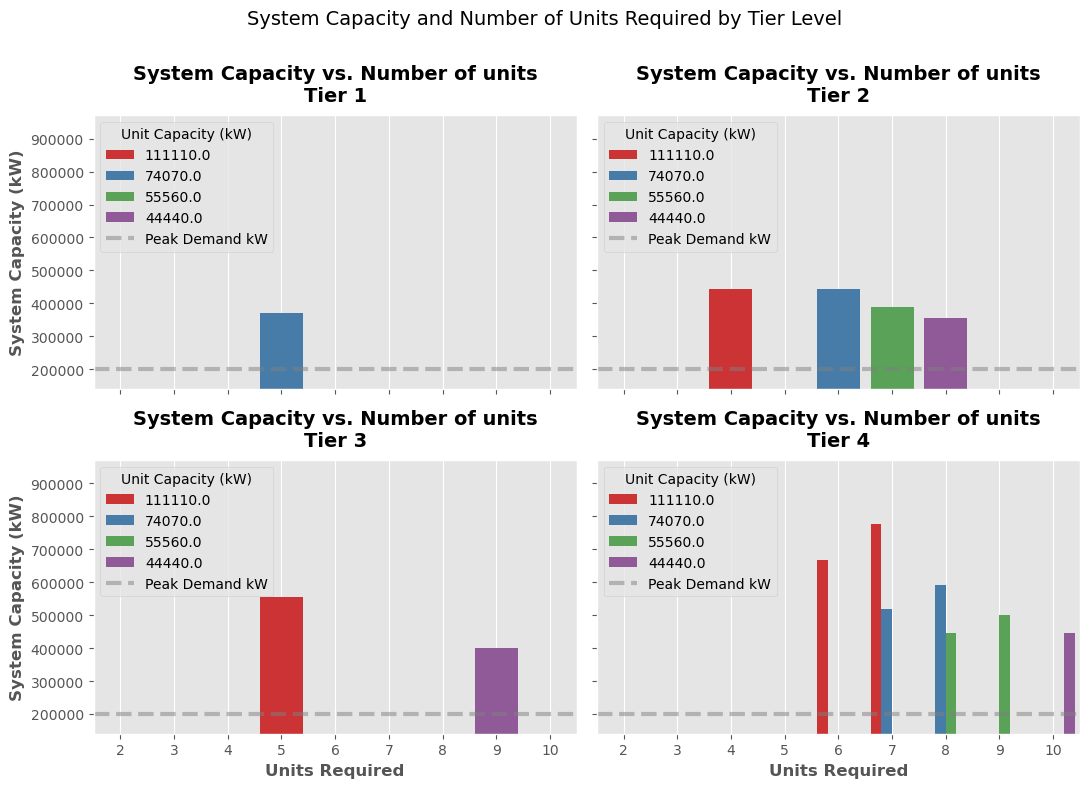

In [225]:
fig, axs = plt.subplots(2,2, figsize=(11,8), sharex=True, sharey=True)
axs = axs.flatten()
categories = df.unit_capacity_kW.unique()
color_palette = sns.color_palette("Set1", len(categories)) 

for i, tier in enumerate(['Tier 1','Tier 2', 'Tier 3', 'Tier 4']):
    filter = df.tier_level == tier
    sns.barplot(data=df[filter].sort_values('units_installed'), x='units_installed', y='system_capacity_kW', order= df.units_installed.unique(), 
                hue='unit_capacity_kW', ax=axs[i], hue_order=categories, palette=dict(zip(categories, color_palette)), ) 
    axs[i].axhline(
    y=df.demand_kW.mean(),  # Use the mean or any representative value
    color='gray', 
    linewidth=3,  # Adjust line thickness
    alpha=0.5,
    linestyle='--',
    label='Peak Demand kW')
    axs[i].set_title(f'System Capacity vs. Number of units\n{tier}')
    axs[i].grid()
    axs[i].legend(loc='upper left', title='Unit Capacity (kW)')
    axs[i].set_xlabel('Units Required')
    axs[i].set_ylabel('System Capacity (kW)')
    axs[i].set_ylim(df.demand_kW.min()*0.7,df.system_capacity_kW.max() * 1.25)
plt.suptitle('System Capacity and Number of Units Required by Tier Level\n', fontsize=14)
plt.tight_layout()
plt.show()